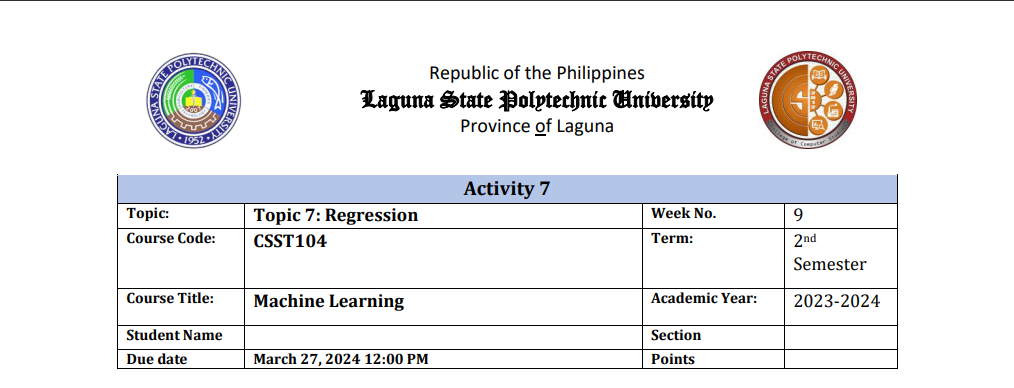

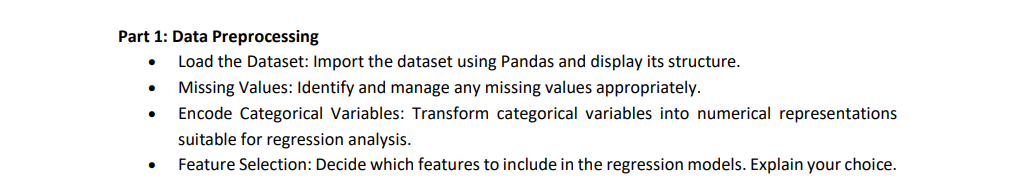

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Netflix_Userbase.csv')
print(df.head())

missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  
Missing Values:
 User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gende

In [ ]:
print(df_dummies.columns)

# Assuming you want to include specific columns in X
selected_columns = ['Age', 'Subscription Type_Premium',
       'Subscription Type_Standard', 'Join Date_01-05-23',
       'Join Date_01-06-22', 'Join Date_01-07-22', 'Join Date_01-08-22',
       'Join Date_01-09-22',
       'Country_Germany', 'Country_Italy', 'Country_Mexico', 'Country_Spain',
       'Country_United Kingdom', 'Country_United States', 'Gender_Male',
       'Device_Smart TV', 'Device_Smartphone', 'Device_Tablet']

# Check if the selected columns exist in df_dummies before creating X
if all(col in df_dummies.columns for col in selected_columns):
    X = df_dummies[selected_columns]
else:
    print("Selected columns do not exist in df_dummies.")

# Assuming y remains the same as the target variable 'Monthly Revenue'
y = df['Monthly Revenue'].astype(int)


Index(['User ID', 'Monthly Revenue', 'Age', 'Subscription Type_Premium',
       'Subscription Type_Standard', 'Join Date_01-05-23',
       'Join Date_01-06-22', 'Join Date_01-07-22', 'Join Date_01-08-22',
       'Join Date_01-09-22',
       ...
       'Country_Germany', 'Country_Italy', 'Country_Mexico', 'Country_Spain',
       'Country_United Kingdom', 'Country_United States', 'Gender_Male',
       'Device_Smart TV', 'Device_Smartphone', 'Device_Tablet'],
      dtype='object', length=342)


Feature Selection: Decide which features to include in the regression models. Explain your choice:

Explanation: I've decided to utilize every columns/variables from the original dataset to further enhance the accuracy of this prediction, I've only excluded the column "Monthly Revenue" since it is the target variable I aim to predict.

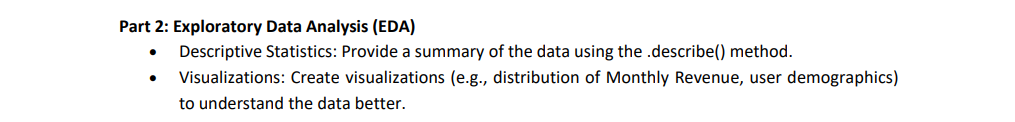

<ipython-input-329-7216713f6e01>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Subscription Type_Premium", y="Monthly Revenue", data=df_dummies, palette='viridis')


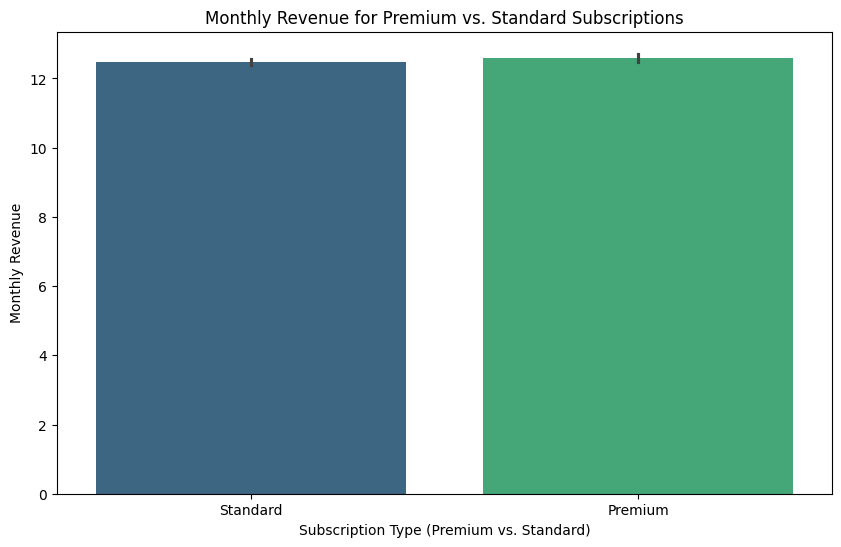

In [ ]:
#Visual for Premium vs Standard Subscriptions
plt.figure(figsize=(10, 6))
sns.barplot(x="Subscription Type_Premium", y="Monthly Revenue", data=df_dummies, palette='viridis')
plt.title("Monthly Revenue for Premium vs. Standard Subscriptions")
plt.xlabel("Subscription Type (Premium vs. Standard)")
plt.ylabel("Monthly Revenue")
plt.xticks([0, 1], ['Standard', 'Premium'])
plt.show()

<ipython-input-330-5e5a99fe903c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Country", y="Monthly Revenue", data=df, edgecolor="gray", palette='magma')


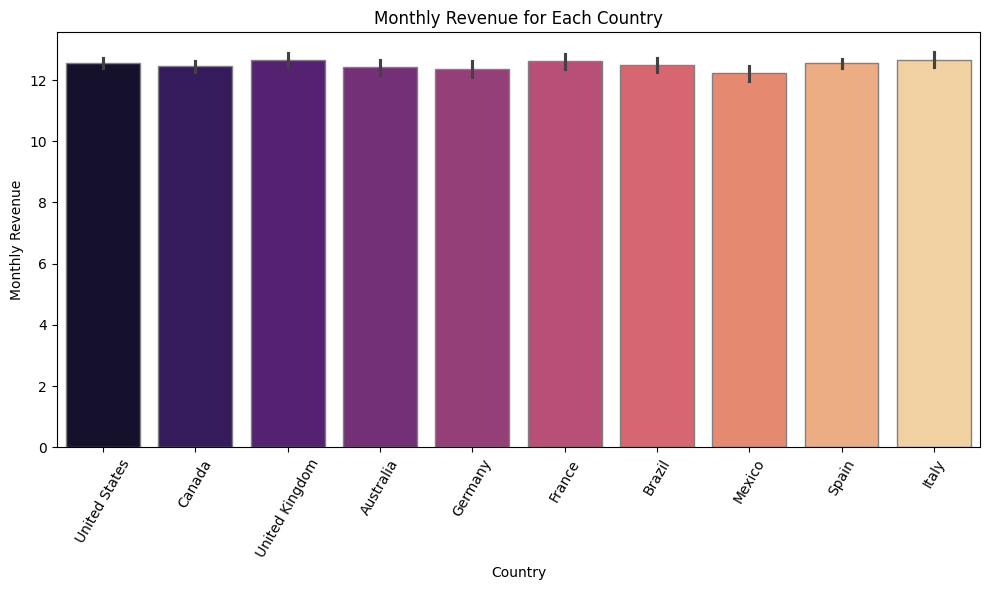

In [ ]:
#Visual for Monthly Revenue for each Country
plt.figure(figsize=(10, 6))
sns.barplot(x="Country", y="Monthly Revenue", data=df, edgecolor="gray", palette='magma')
plt.title("Monthly Revenue for Each Country")
plt.xlabel("Country")
plt.ylabel("Monthly Revenue")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


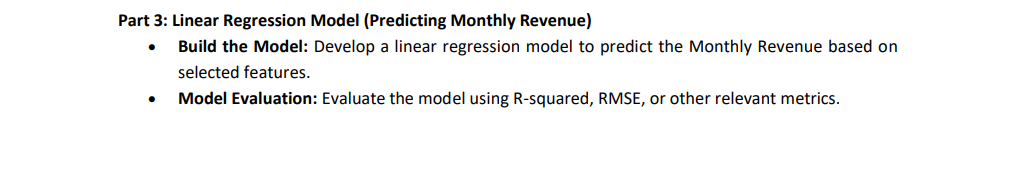

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model using R-squared and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")


R-squared: -0.02508222552374706
RMSE: 1.68268743969989


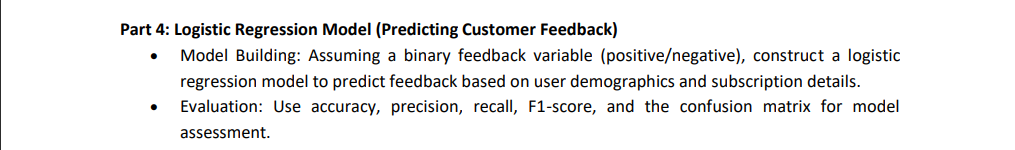

In [ ]:
# Convert y_test and y_pred_binary to binary format
y_test_binary = (y_test >= threshold).astype(int)
y_pred_binary = (y_pred_binary >= threshold).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[500]]


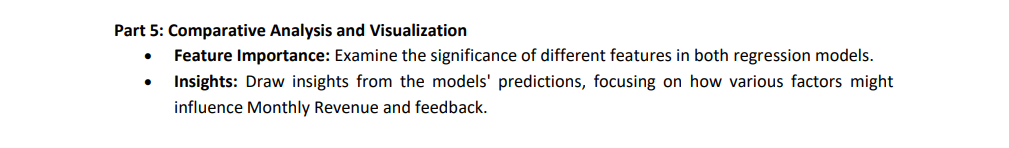

<ipython-input-333-c128955c6426>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', orient='h', palette='viridis')


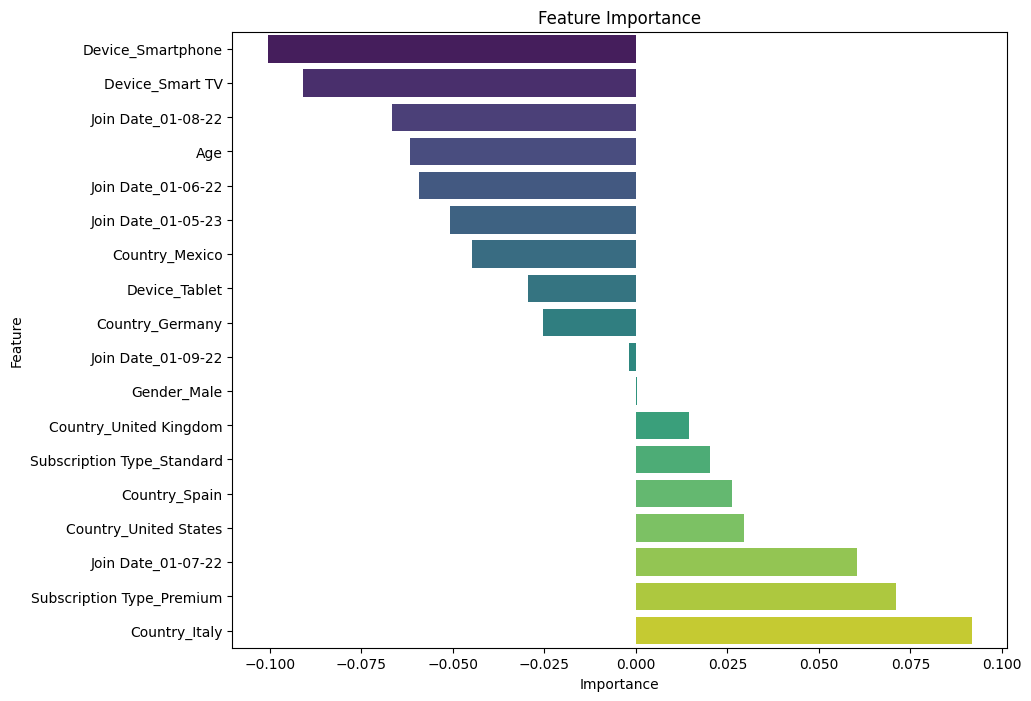

In [ ]:
if len(model.coef_.shape) > 1:
    feature_importance = model.coef_[0]
else:
    feature_importance = model.coef_

feature_names = X.columns

# Sort by importance
importance_df = importance_df.sort_values('Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature', orient='h', palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# **INSIGHT:**

 It can be seen that the crucial contributors are specific countries and subscription types, indicating their significant impact on Monthly Revenue.

This insight shows that factors related to customer demographics, such as the geographical location and subscription plans, play a crucial role in determining the revenue generated.

For instance, countries with higher subscription rates or premium plans might lead to increased revenue due to higher customer spending or engagement levels.